In [60]:
#importing all the modules required
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

import warnings

warnings.filterwarnings(action="ignore")

In [2]:
df =  pd.read_csv('data/Pokemon.csv') 

In [3]:
df.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [15]:
df.columns

Index(['Number', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary', 'Color',
       'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate',
       'Body_Style'],
      dtype='object')

In [5]:
df.describe()

,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Pr_Male,Height_m,Weight_kg,Catch_Rate
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,644.000000,721.000000,721.000000,721.000000
mean,361.00000,417.945908,68.380028,75.013870,70.808599,68.737864,69.291262,65.714286,3.323162,0.553377,1.144979,56.773370,100.246879
std,208.27906,109.663671,25.848272,28.984475,29.296558,28.788005,27.015860,27.277920,1.669873,0.199969,1.044369,89.095667,76.573513
min,1.00000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000,0.100000,0.100000,3.000000
25%,181.00000,320.000000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,2.000000,0.500000,0.610000,9.400000,45.000000
50%,361.00000,424.000000,65.000000,74.000000,65.000000,65.000000,65.000000,65.000000,3.000000,0.500000,0.990000,28.000000,65.000000
75%,541.00000,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,5.000000,0.500000,1.400000,61.000000,180.000000
max,721.00000,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,6.000000,1.000000,14.500000,950.000000,255.000000


<Figure size 720x576 with 0 Axes>

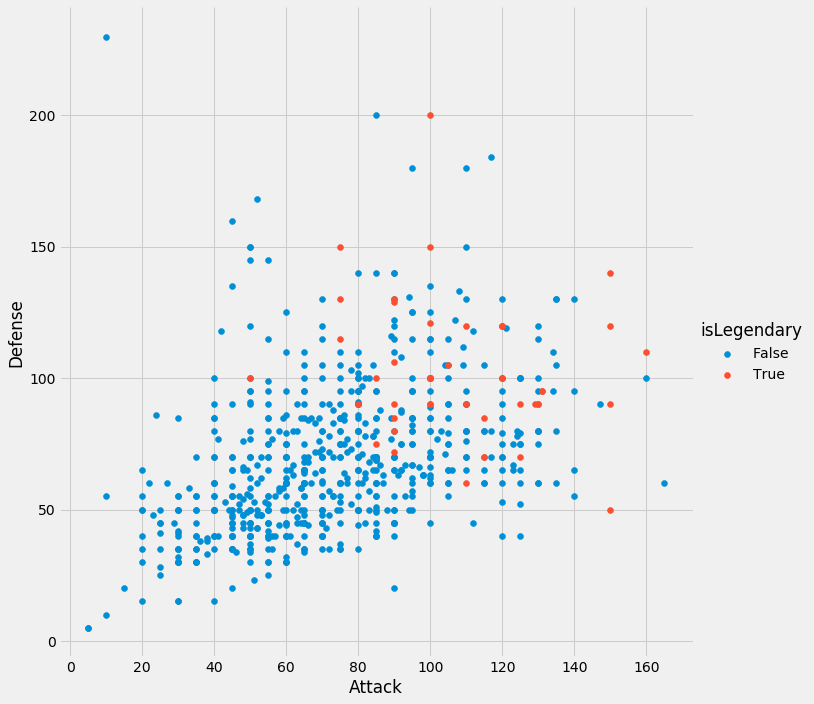

In [6]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))

sns.FacetGrid(df, hue="isLegendary", size = 10).map(plt.scatter, "Attack", "Defense").add_legend()

[[<matplotlib.axes._subplots.AxesSubplot object at 0x11ba9f198>


<Figure size 1080x1080 with 0 Axes>

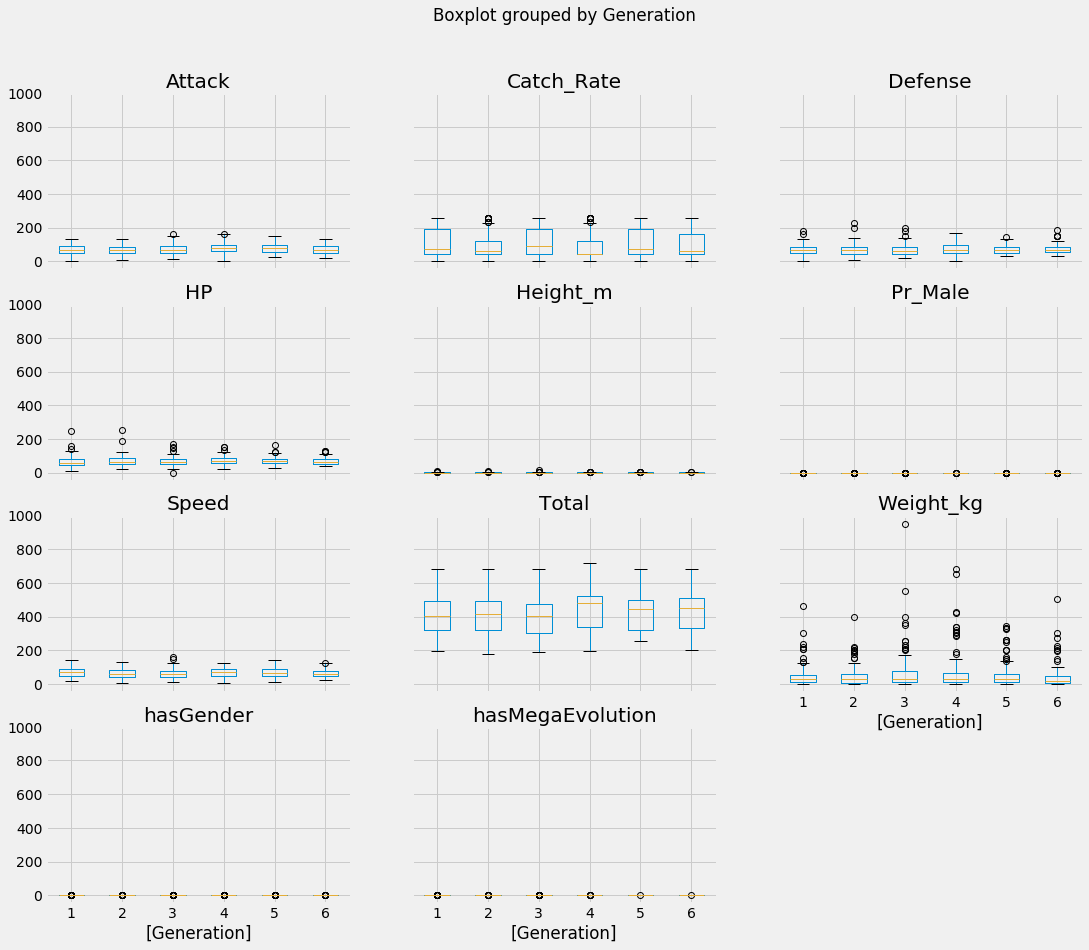

In [7]:
plt.figure(figsize=(15,15))
print(df.drop(["Number","Type_2","isLegendary","Type_1","Sp_Atk","Sp_Def"], axis=1).boxplot(by="Generation",figsize=(18, 15)))

In [12]:
df = df.set_index('Name')
df2 = df[(df['Type_1']=='Fire')]
df2 = df2.drop('Generation', axis=1)
print("Fire Pokemon with Max HP:",df2['HP'].argmax())
print("Fire Pokemon with Max SPEED:", df2['Speed'].argmax())
print("Fire Pokemon with Max Sp.Attack:", df2['Sp_Atk'].argmax())
print("Fire Pokemon with Max Sp.Defense:", df2['Sp_Def'].argmax())
print("Fire Pokemon with Max Attack:", df2['Attack'].argmax())
print("Fire Pokemon with Max Defense:", df2['Defense'].argmax())

Fire Pokemon with Max HP: Entei
Fire Pokemon with Max SPEED: Talonflame
Fire Pokemon with Max Sp.Attack: Heatran
Fire Pokemon with Max Sp.Defense: Ho-Oh
Fire Pokemon with Max Attack: Darmanitan
Fire Pokemon with Max Defense: Torkoal


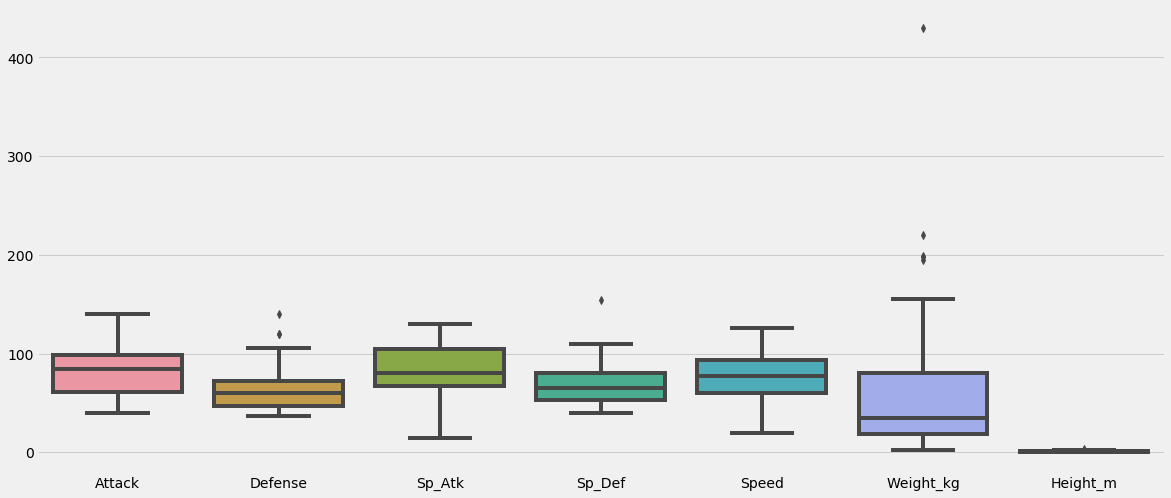

In [26]:
plt.figure(figsize=(18,8))

df3 = df[(df['Type_1']=='Fire')]#selecting fire type 
df3 = df3[["Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed", "Weight_kg", "Height_m"]]
sns.boxplot(data = df3)


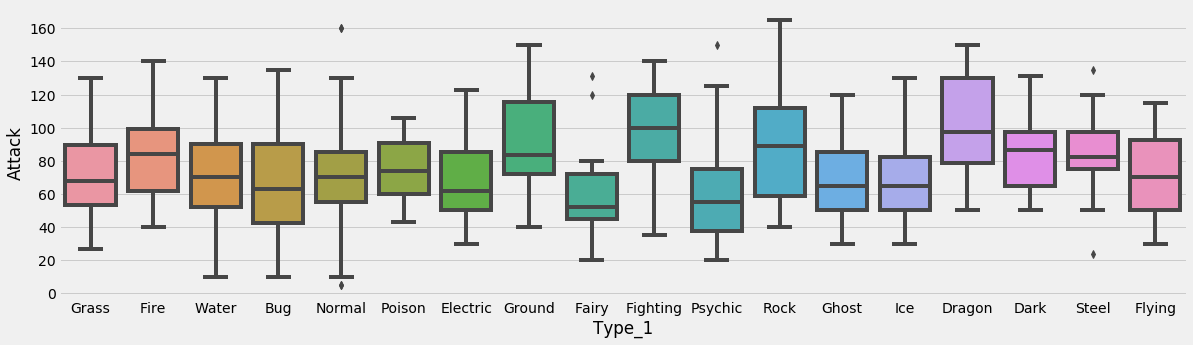

In [30]:
plt.subplots(figsize = (18,5))
sns.boxplot(x="Type_1", y="Attack", data=df)

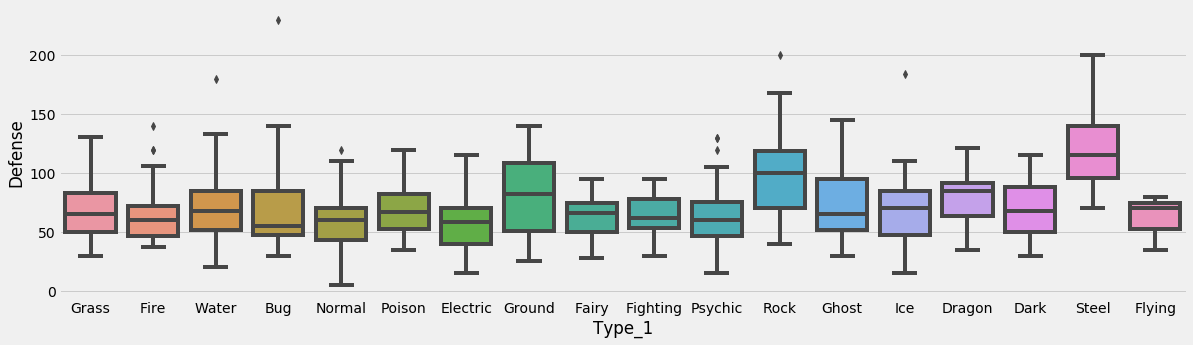

In [31]:
plt.subplots(figsize = (18,5))
sns.boxplot(x="Type_1", y="Defense", data=df)

In [34]:
df.pivot_table(values='isLegendary',index=['Generation'],aggfunc=np.mean).reset_index()

,Generation,isLegendary
0,1,0.026490
1,2,0.050000
2,3,0.074074
3,4,0.102804
4,5,0.064103
5,6,0.083333


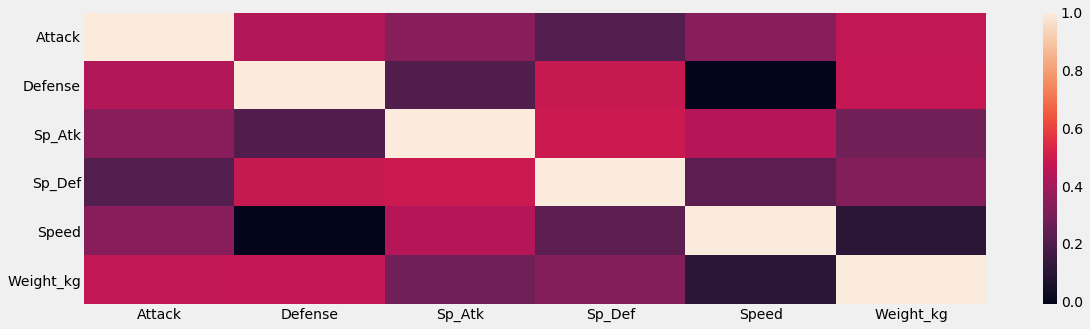

In [116]:
plt.subplots(figsize = (18,5))
sns.heatmap(df[["Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed", "Weight_kg"]].corr())

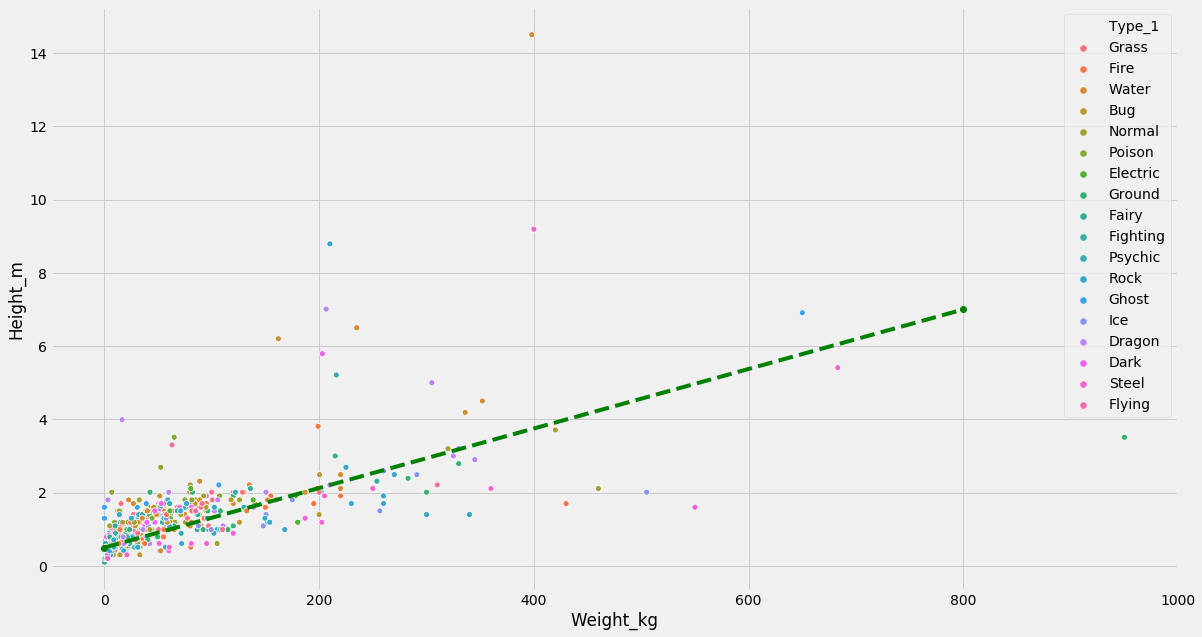

In [47]:
plt.subplots(figsize = (18,10))
plt.plot([0, 800], [0.5, 7], '--go')
sns.scatterplot(x=df["Weight_kg"], y=df["Height_m"], hue=df["Type_1"])

In [50]:
from sklearn.linear_model import LinearRegression

X = df[["Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed", "Weight_kg"]]
linear_model = LinearRegression()
linear_model.fit(X, df["Height_m"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
pd.DataFrame(list(zip(X.columns, linear_model.coef_)))

,0,1
0,Attack,0.002282
1,Defense,0.000582
2,Sp_Atk,0.002843
3,Sp_Def,0.001594
4,Speed,0.003693
5,Weight_kg,0.006769


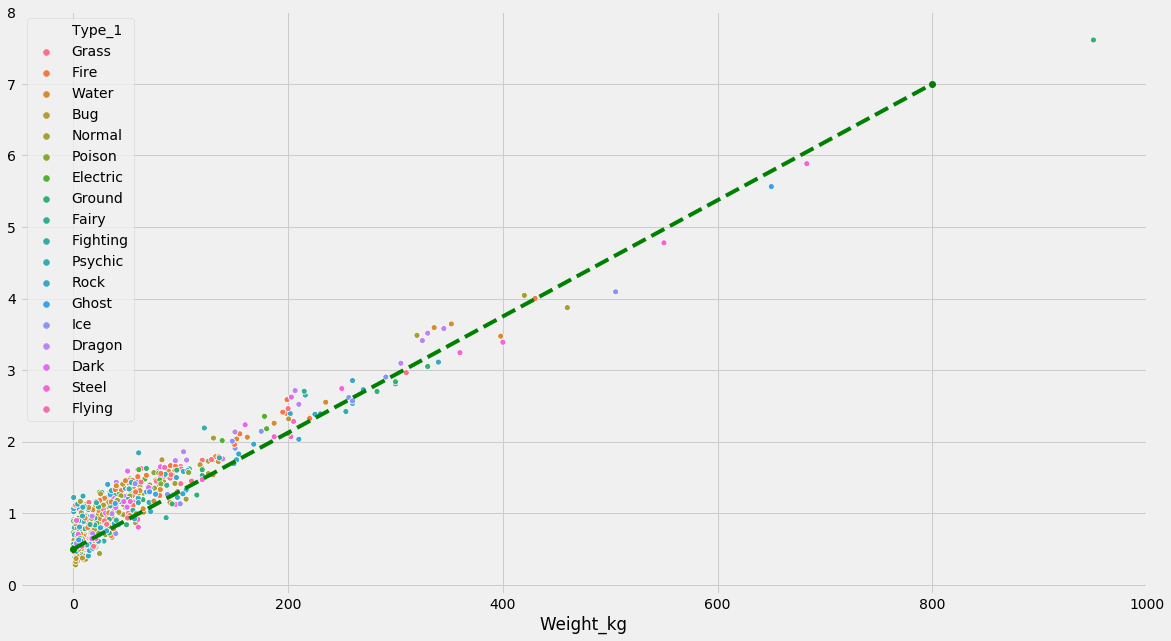

In [52]:
plt.subplots(figsize = (18,10))
plt.plot([0, 800], [0.5, 7], '--go')
sns.scatterplot(x=df["Weight_kg"], y=linear_model.predict(X), hue=df["Type_1"])


In [83]:
linear_model.score(X, df["Height_m"])

0.4677383925704836

In [84]:
mean_squared_error = np.mean((df["Height_m"] - linear_model.predict(X))**2)
mean_squared_error

0.579735522257556

In [66]:
X_train, X_test, Y_train, Y_test = \
sklearn.cross_validation.train_test_split(X, df["Height_m"], test_size=0.33, random_state = 34)

In [67]:
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [68]:
pred_train = linear_model.predict(X_train)
pred_test = linear_model.predict(X_test)

In [78]:
np.mean((Y_train - pred_train) ** 2)

0.6554952019010467

In [79]:
np.mean((Y_test - pred_test) ** 2)

0.42598793709870725

In [108]:
X = df[["Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed", "Weight_kg", "Height_m"]]
logistic_model = LogisticRegression()
logistic_model.fit(X, df["isLegendary"])
predictions = logistic_model.predict(X)
accuracy = metrics.accuracy_score(predictions,df["isLegendary"])
print(accuracy)

0.9528432732316228
